In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
from sklearn import metrics, decomposition, linear_model
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline, make_pipeline

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Proces Uczenia AI/Prostate_Cancer.csv')
df.head(10)

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
5,6,B,25,25,83,477,0.128,0.170,0.209,0.076
6,7,M,16,26,120,1040,0.095,0.109,0.179,0.057
7,8,M,15,18,90,578,0.119,0.165,0.220,0.075
8,9,M,19,24,88,520,0.127,0.193,0.235,0.074
9,10,M,25,11,84,476,0.119,0.240,0.203,0.082


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


In [ ]:
print(df.shape)

(100, 10)


In [ ]:
df.drop('id',axis=1,inplace=True)

In [ ]:
df['diagnosis_result'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df=df.replace({'diagnosis_result':{'M':1,'B':0}})
df['diagnosis_result'].unique()

array([1, 0])

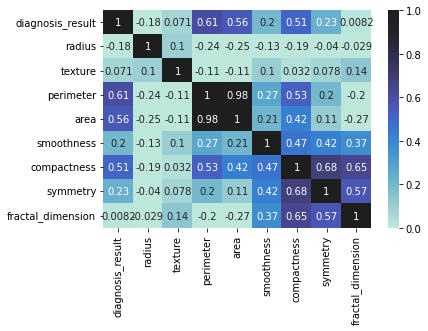

In [ ]:
sns.heatmap(df.corr(),annot=True,vmin=0, vmax=1, center=True)

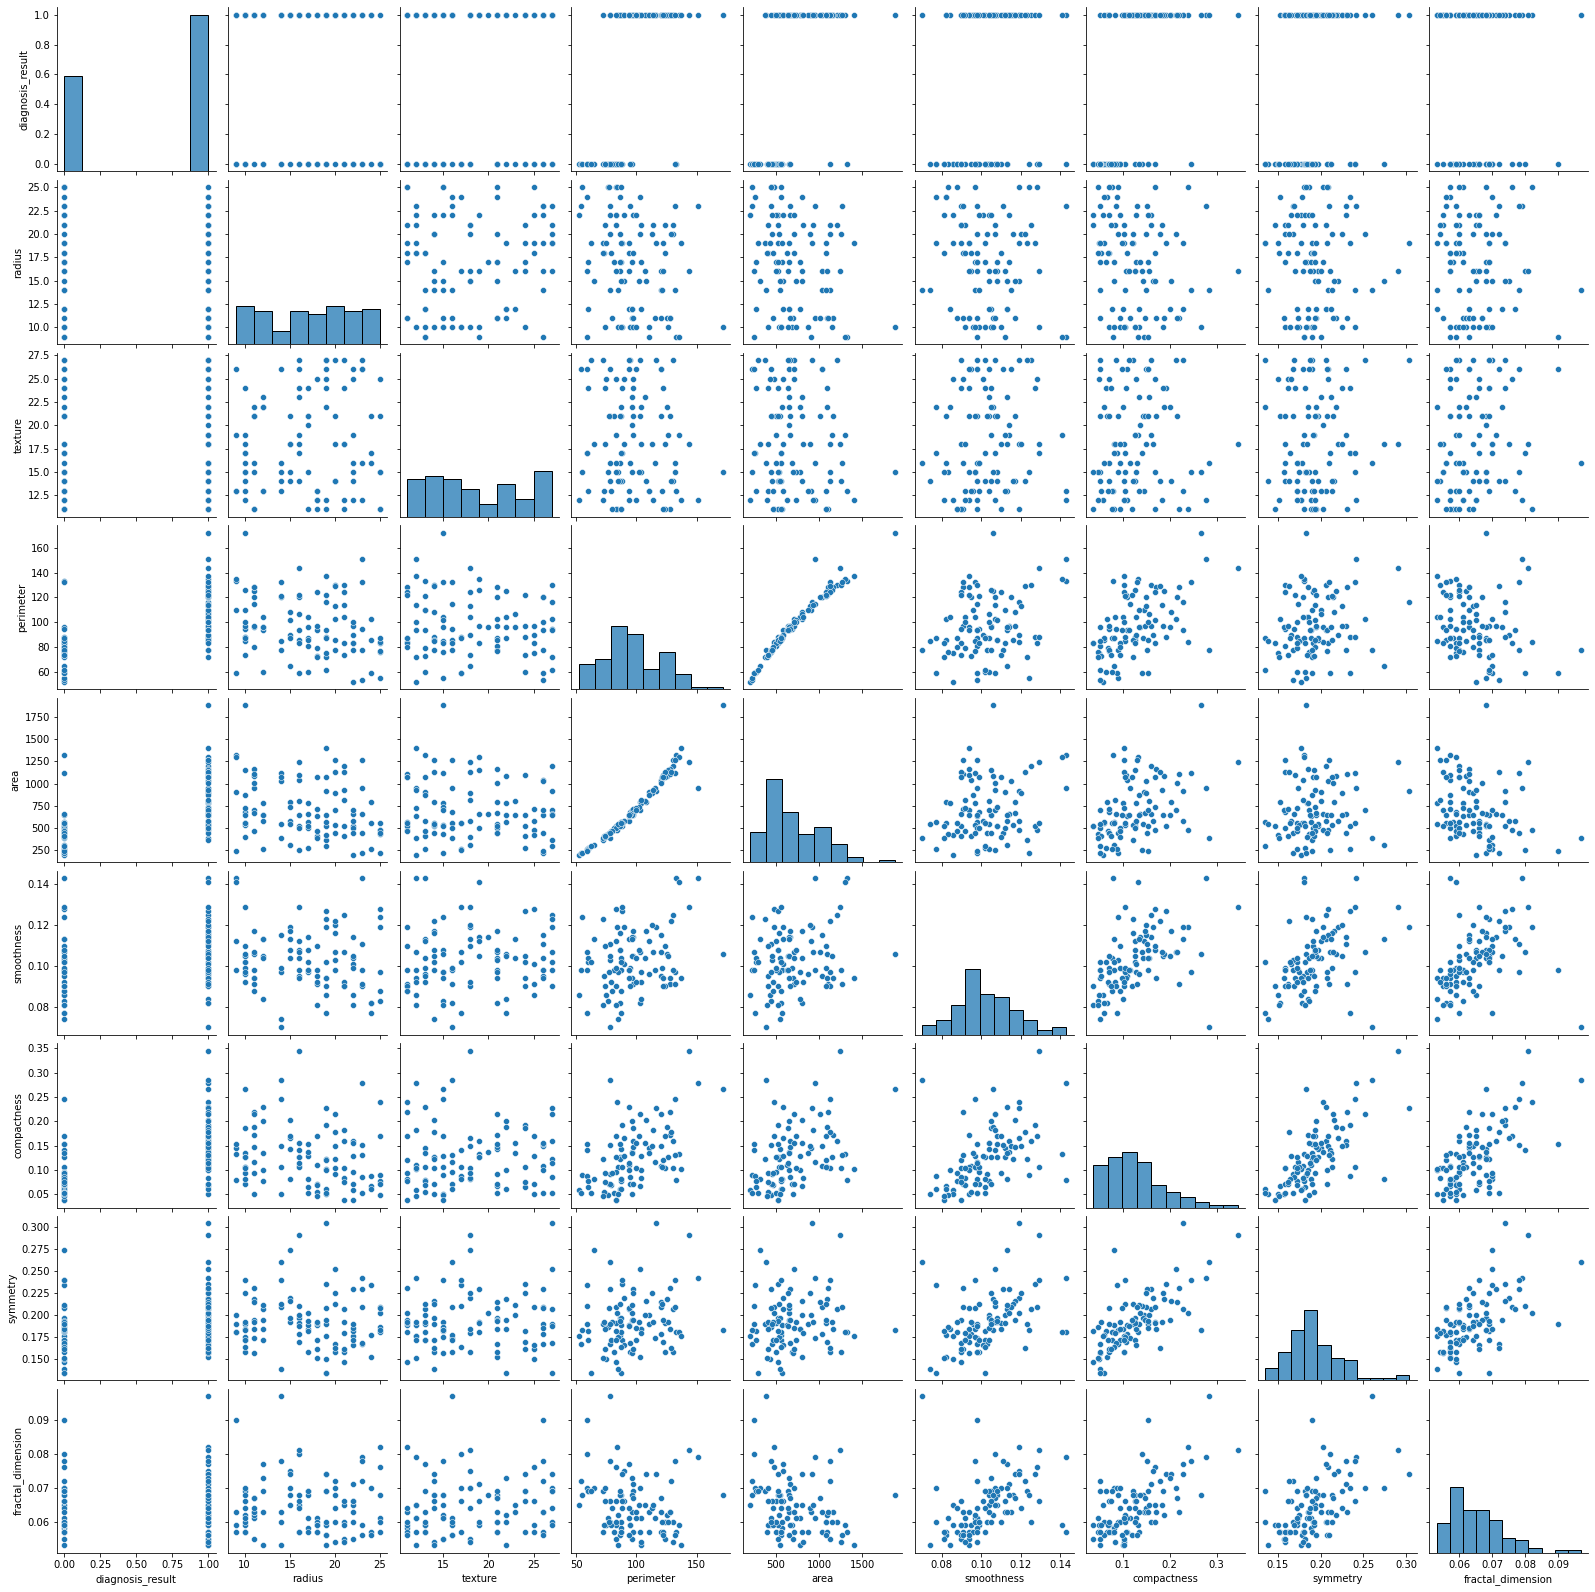

In [ ]:
sns.pairplot(df)

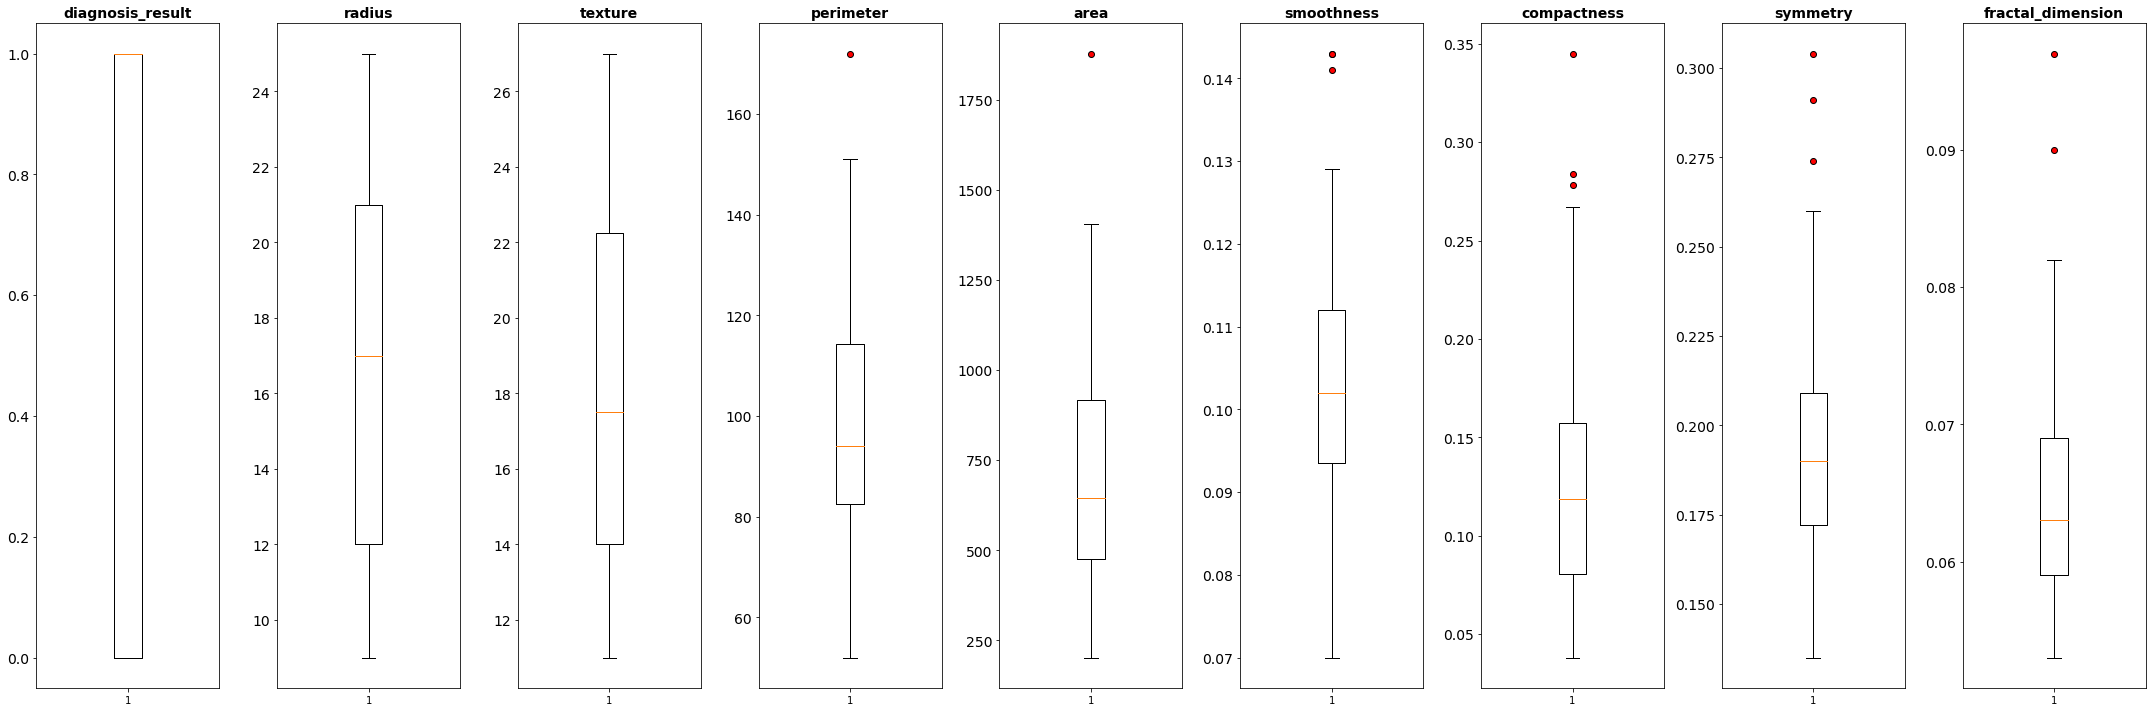

In [ ]:
outliers = dict(markerfacecolor='red', marker='o', markeredgecolor='black')

fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i], flierprops=outliers)
  ax.set_title(df.columns[i], fontsize=14, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [ ]:
for otl in df:
    q75,q25 = np.percentile(df.loc[:, otl],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[otl] < min, otl] = np.nan
    df.loc[df[otl] > max, otl] = np.nan

In [ ]:
df.isnull().sum()

diagnosis_result     0
radius               0
texture              0
perimeter            1
area                 1
smoothness           3
compactness          3
symmetry             3
fractal_dimension    2
dtype: int64

In [ ]:
df = df.dropna(axis = 0)

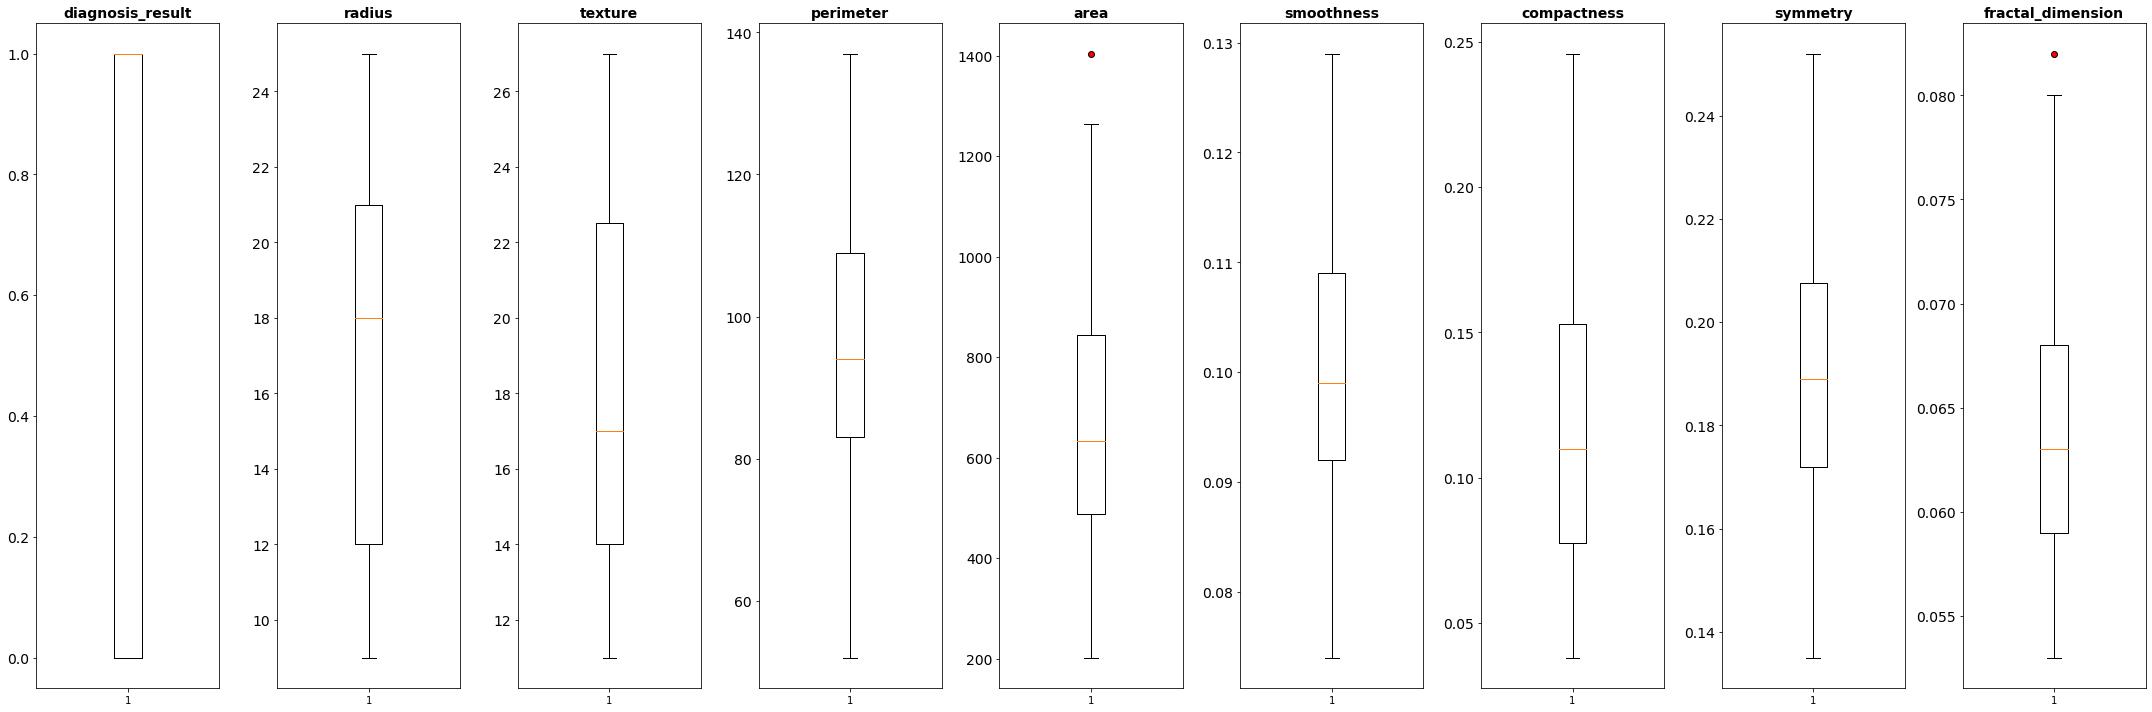

In [ ]:
outliers = dict(markerfacecolor='red', marker='o', markeredgecolor='black')

fig, axs = plt.subplots(1, len(df.columns), figsize=(30,10))

for i, ax in enumerate(axs.flat):
  ax.boxplot(df.iloc[:,i], flierprops=outliers)
  ax.set_title(df.columns[i], fontsize=14, fontweight='bold')
  ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

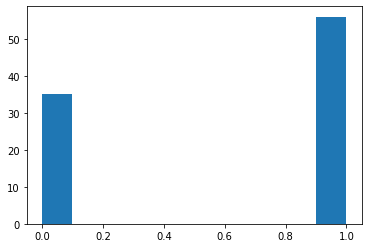

In [ ]:
plt.hist(df['diagnosis_result'])
plt.show()

In [ ]:
scaler = MinMaxScaler()
 
df['diagnosis_result'] = scaler.fit_transform(df[['diagnosis_result']])

<ipython-input-34-4130b0aee0cf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis_result'] = scaler.fit_transform(df[['diagnosis_result']])


In [ ]:
x = df[['radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension']]
y = df['diagnosis_result']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, stratify=y)

In [ ]:
print("X_train shape : ", X_train.shape)
print("y_train shape : ", y_train.shape)
print("X_test shape : ",  X_test.shape)
print("y_test shape : ",  y_test.shape)

X_train shape :  (72, 8)
y_train shape :  (72,)
X_test shape :  (19, 8)
y_test shape :  (19,)


In [ ]:
sc = StandardScaler()

pipeline_models = [Pipeline([('scaler', sc), ('Logistic Regression', LogisticRegression())]),
                   Pipeline([('scaler', sc), ('SGD', SGDClassifier())]),
                   Pipeline([('scaler', sc), ('Random Forest', RandomForestClassifier())]),
                   Pipeline([('scaler', sc), ('KNN', KNeighborsClassifier())]),
                   Pipeline([('scaler', sc), ('Decision Tree', DecisionTreeClassifier())])]

In [ ]:
for model in pipeline_models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  metric = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
  print('Score: ', model, f'{metric.mean():.2f}',"+/-", f'{metric.std():.2f}')

Score:  Pipeline(steps=[('scaler', StandardScaler()),
                ('Logistic Regression', LogisticRegression())]) 0.82 +/- 0.13
Score:  Pipeline(steps=[('scaler', StandardScaler()), ('SGD', SGDClassifier())]) 0.72 +/- 0.18
Score:  Pipeline(steps=[('scaler', StandardScaler()),
                ('Random Forest', RandomForestClassifier())]) 0.80 +/- 0.14
Score:  Pipeline(steps=[('scaler', StandardScaler()), ('KNN', KNeighborsClassifier())]) 0.79 +/- 0.15
Score:  Pipeline(steps=[('scaler', StandardScaler()),
                ('Decision Tree', DecisionTreeClassifier())]) 0.76 +/- 0.16


In [ ]:
logreg = pipeline_models[0]
logreg.fit(X_train, y_train)
print("Train score: ", logreg.score(X_train, y_train))
print("Test score: ", logreg.score(X_test, y_test))

Train score:  0.8888888888888888
Test score:  0.8947368421052632


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


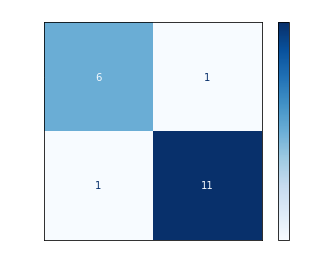

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

color = 'white'
matrix = plot_confusion_matrix(logreg, X_test, y_test, cmap=plt.cm.Blues)
matrix.ax_.set_title('Confusion Matrix', color=color)
plt.xlabel('Predicted Label', color=color)
plt.ylabel('True Label', color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77         7
         1.0       0.85      0.92      0.88        12

    accuracy                           0.84        19
   macro avg       0.84      0.82      0.82        19
weighted avg       0.84      0.84      0.84        19



In [ ]:
print(LogisticRegression().get_params().keys())

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])


In [ ]:
pca = PCA()
logistic = LogisticRegression(max_iter=25, tol=0.001)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'logistic__C': np.logspace(-4, 4, 4),
    'logistic__solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
    'logistic__fit_intercept': [True, False],
    'logistic__multi_class': ['auto', 'ovr']
    }

gs = GridSearchCV(pipe, param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)
print("Best score: (CV score = %0.3f):" % gs.best_score_)
print("Best parameters:", gs.best_params_)

clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Dokładność testu: %.3f' % clf.score(X_test, y_test))

Best score: (CV score = 0.835):
Best parameters: {'logistic__C': 21.54434690031882, 'logistic__fit_intercept': True, 'logistic__multi_class': 'auto', 'logistic__solver': 'liblinear', 'pca__n_components': 3}
Dokładność testu: 0.842


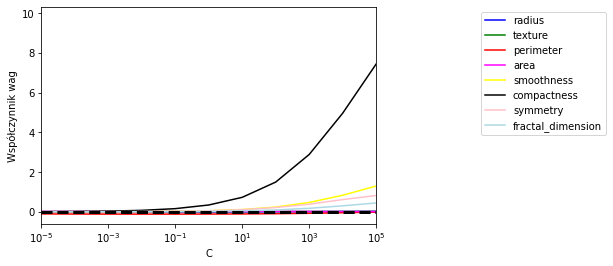

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 
          'magenta', 'yellow', 'black', 
          'pink', 'lightblue']

weights, params = [], []
for c in np.arange(-7., 7.):
    logreg = LogisticRegression(max_iter=35, penalty='l2', C=2.2**c, random_state=1, solver="liblinear")
    logreg.fit(X_train, y_train)
    weights.append(logreg.coef_[0])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df.columns[column + 1],
             color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('Współczynnik wag')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', 
          bbox_to_anchor=(1.5, 1),
          ncol=1, fancybox=True)
plt.show()